<a href="https://colab.research.google.com/github/Mariihmp/medical_ml/blob/main/breast_cancer_prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install opendatasets --upgrade --quiet
!pip install pandas-profiling --upgrade --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.6/262.6 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.8/309.8 kB 30.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 46.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 26.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.6.1 requires joblib>=1.2.0, but you have joblib 1.1.1 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires n

In [5]:
# Import libraries
import opendatasets as od

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import sys

# Data science tools
import pandas as pd
import numpy as np
import scipy as sp
import psutil, os
# from pandas_profiling import ProfileReport

# Scikit-learn library
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Visualizations
import matplotlib.pyplot as plt
import matplotlib.image as mimg # images
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix

###This database is also available through the UW CS ftp server
: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Attribute Information

  -ID Number

  -Dianosis ( M = Malignant, B = Benign)

  -Ten real-valued features are computed for each cell nucleus:

  -radius (mean of distances from center to points on the perimeter)
  
  -texture (standard deviation of gray-scale values)

  -perimeter

  -area

  -smoothness (local variation in radius lengths)

  -compactness (perimeter^2 / area - 1.0)

  -concavity (severity of concave portions of the contour)

  -concave points (number of concave portions of the contour)

  -symmetry

  -fractal dimension ("coastline approximation" - 1)

In [6]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"

In [7]:
names =["id" ,
        "clump_thickness",
        "uniform_cell_size",
        "uniform_cell_shape",
        "marginal_adhesion",
        "single_epithelial_size",
        "bare_nuclei", "bland_chromaton",
        "normal_nucleoli",
        "nutises",
        "class"]
df = pd.read_csv(url, names=names)

In [8]:
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromaton,normal_nucleoli,nutises,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [9]:
df.describe(include = "all")


,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromaton,normal_nucleoli,nutises,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


**Reasoning**:
Iterate through the columns of the DataFrame `df` and calculate the number of missing values, the number of unique values, and the percentage of missing values using pandas methods, storing the results in a dictionary.



In [10]:
column_stats = {}
for col in df.columns:
    missing_count = df[col].isnull().sum()
    unique_count = df[col].nunique()
    missing_percentage = (missing_count / len(df)) * 100
    column_stats[col] = {
        'missing_count': missing_count,
        'unique_count': unique_count,
        'missing_percentage': missing_percentage
    }

display(column_stats)

{'id': {'missing_count': np.int64(0),
  'unique_count': 645,
  'missing_percentage': np.float64(0.0)},
 'clump_thickness': {'missing_count': np.int64(0),
  'unique_count': 10,
  'missing_percentage': np.float64(0.0)},
 'uniform_cell_size': {'missing_count': np.int64(0),
  'unique_count': 10,
  'missing_percentage': np.float64(0.0)},
 'uniform_cell_shape': {'missing_count': np.int64(0),
  'unique_count': 10,
  'missing_percentage': np.float64(0.0)},
 'marginal_adhesion': {'missing_count': np.int64(0),
  'unique_count': 10,
  'missing_percentage': np.float64(0.0)},
 'single_epithelial_size': {'missing_count': np.int64(0),
  'unique_count': 10,
  'missing_percentage': np.float64(0.0)},
 'bare_nuclei': {'missing_count': np.int64(0),
  'unique_count': 11,
  'missing_percentage': np.float64(0.0)},
 'bland_chromaton': {'missing_count': np.int64(0),
  'unique_count': 10,
  'missing_percentage': np.float64(0.0)},
 'normal_nucleoli': {'missing_count': np.int64(0),
  'unique_count': 10,
  'missin

**Reasoning**:
The error indicates that the DataFrame `df` was not defined in the current execution environment. I need to recreate the DataFrame by reading the data from the URL again.



In [13]:
df_column_stats = pd.DataFrame(column_stats).T
display(df_column_stats)

,missing_count,unique_count,missing_percentage
id,0.0,645.0,0.0
clump_thickness,0.0,10.0,0.0
uniform_cell_size,0.0,10.0,0.0
uniform_cell_shape,0.0,10.0,0.0
marginal_adhesion,0.0,10.0,0.0
single_epithelial_size,0.0,10.0,0.0
bare_nuclei,0.0,11.0,0.0
bland_chromaton,0.0,10.0,0.0
normal_nucleoli,0.0,10.0,0.0
nutises,0.0,9.0,0.0



**Missing Data Hnadling**
There are some steps to be considered

First, our dataset contains some missing data. To deal with we will add df.replace method.

*   First, our dataset contains some missing data. To deal with we will add df.replace method.
*   If df.replace method gives us a question mark, it means that there is no data there. We are simply going to input the value -999999 and tell python to ignore that data.
* We will perform the print(df.axes) operation so that we can see the columns. We can see that we have 696 different data points and each of those cases has 11 different columns.

* Next, we will print the shape of the dataset using the print(df.shape) operation




In [18]:
# preprocess the data
df.replace("?",-999999, inplace = True)
print(df.axes)
df.drop(["id"], axis=1, inplace = True)

# print the shape of the dataset
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromaton', 'normal_nucleoli', 'nutises', 'class'],
      dtype='object')]
(699, 10)


In [22]:
df.loc[6]

,6
clump_thickness,1
uniform_cell_size,1
uniform_cell_shape,1
marginal_adhesion,1
single_epithelial_size,2
bare_nuclei,10
bland_chromaton,3
normal_nucleoli,1
nutises,1
class,2


We will visualize the parameters of the dataset

We will print the first point so that we can see what it entails.
We have a value of between 0 and 10 in all the different columns. In the class column, the number of 2 represents a benign tumor and the number 4 represents a malignant tumor.
There are 699 cells in the datasets.
The next step will be to do a print.describe operation, which gives us the mean, standard deviation, and other aspects for each our different parameters or features.


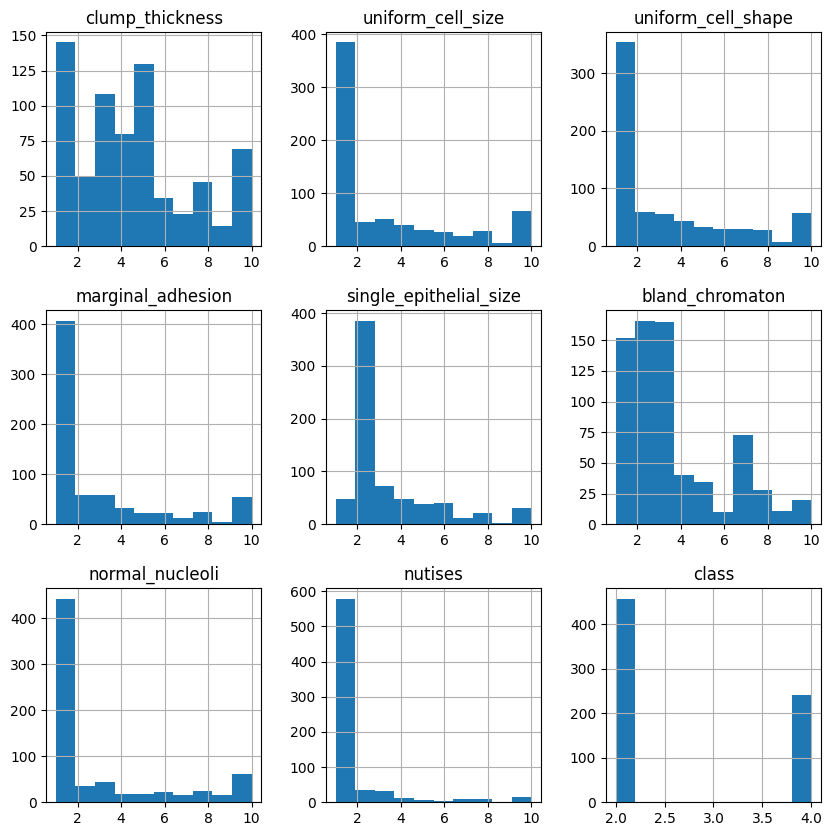

In [24]:
df.hist(figsize=(10,10))
plt.show()


In [30]:
data = np.array(df.drop(["class"], axis=1))
target = np.array(df["class"])

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

**Reasoning**:
Import the Pipeline class from the sklearn.pipeline module as instructed.



In [31]:
from sklearn.pipeline import Pipeline

## Create a pipeline for each model

### Subtask:
Define a list of pipelines, where each pipeline includes the model and any preprocessing steps.


**Reasoning**:
Define the pipelines for KNeighborsClassifier and SVC models and add them to the pipelines list.



In [36]:
pipelines = [('KNeighborsClassifier', KNeighborsClassifier()),('SVC', SVC())]


## Evaluate each pipeline

### Subtask:
Iterate through the list of pipelines and evaluate each one using cross-validation, similar to the current approach but using the pipeline object.


**Reasoning**:
Iterate through the pipelines and evaluate each one using cross-validation, storing the results.



In [38]:
results = []
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)

In [39]:
for i, result in enumerate(results):
    print(f"Pipeline {i+1} - Mean Accuracy: {result.mean():.4f}, Standard Deviation: {result.std():.4f}")

Pipeline 1 - Mean Accuracy: 0.9696, Standard Deviation: 0.0212
Pipeline 2 - Mean Accuracy: 0.6584, Standard Deviation: 0.0491


In [35]:
pipeline_evaluations = []

for i, result in enumerate(results):
    # Get the model name from the pipeline
    model_name = pipelines[i].steps[0][0]

    mean_accuracy = result.mean()
    std_accuracy = result.std()

    pipeline_evaluations.append({
        'model': model_name,
        'mean_accuracy': mean_accuracy,
        'std_accuracy': std_accuracy
    })

    print(f"{model_name} - Mean Accuracy: {mean_accuracy:.4f}, Standard Deviation: {std_accuracy:.4f}")

KNeighborsClassifier - Mean Accuracy: 0.9696, Standard Deviation: 0.0212
SVC - Mean Accuracy: 0.6584, Standard Deviation: 0.0491


In [40]:
for name, model in pipelines:
  model.fit(X_train, y_train)
  predictions = model.predict(X_test)
  print("{}:{.3f}.format(name, accuracy_score(y_test,predictions))")
  print(classification_report(y_test, predictions))

{}:{.3f}.format(name, accuracy_score(y_test,predictions))
              precision    recall  f1-score   support

           2       0.98      0.97      0.97        90
           4       0.94      0.96      0.95        50

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

{}:{.3f}.format(name, accuracy_score(y_test,predictions))
              precision    recall  f1-score   support

           2       0.64      1.00      0.78        90
           4       0.00      0.00      0.00        50

    accuracy                           0.64       140
   macro avg       0.32      0.50      0.39       140
weighted avg       0.41      0.64      0.50       140



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
